In [1]:
import pandas as pd
import datetime as dt
import footballData as fd
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime
import time
import Elo as ELO
import seaborn as sns
from datetime import date, datetime


In [26]:
Boost=pd.read_csv('United2014b.csv')

In [3]:
Vanilla=pd.read_csv('UnitedVanilla2014.csv')

In [4]:
date=Boost['TimeStamp']

In [95]:
Vanilla

,Unnamed: 0,index,TimeStamp,Rating,Rd,CalendarYear
0,0,2189,2014-01-03,1967.755453,56.449008,2014
1,1,2190,2014-01-10,1967.755453,56.830048,2014
2,2,2191,2014-01-14,1970.811645,56.793654,2014
3,3,2192,2014-01-24,1962.600128,56.441444,2014
4,4,2193,2014-01-31,1965.084907,56.475606,2014
5,5,2194,2014-02-04,1951.504322,56.315101,2014
6,6,2195,2014-02-14,1946.780958,55.648151,2014
7,7,2196,2014-02-21,1946.780958,56.034638,2014
8,8,2197,2014-02-25,1950.292948,55.965456,2014
9,9,2198,2014-03-07,1950.292948,56.349767,2014


In [27]:
Boost

,Unnamed: 0,TimeStamp,Rating,Rating Deviation,Year
0,2189,2014-01-03,1962.702281,55.898114,2014
1,2190,2014-01-10,1962.702281,56.008051,2014
2,2191,2014-01-14,1965.691496,55.720731,2014
3,2192,2014-01-24,1957.887234,55.149447,2014
4,2193,2014-01-31,1960.310195,54.933155,2014
5,2194,2014-02-04,1947.639947,54.545931,2014
6,2195,2014-02-14,1943.180990,53.715094,2014
7,2196,2014-02-21,1943.180990,53.829491,2014
8,2197,2014-02-25,1946.431402,53.543306,2014
9,2198,2014-03-07,1946.431402,53.658069,2014


In [28]:
BoostRd=Boost['Rating Deviation']
VanillaRd=Vanilla['Rd']

In [29]:
df1 = pd.DataFrame(date)
df2 = pd.DataFrame(BoostRd)
df3 = pd.DataFrame(VanillaRd)

df2 = pd.concat([df1, df2, df3], join='outer', axis=1)

In [30]:
df2.columns = ['Date', 'Boost', 'Vanilla']
df2['Date']=pd.to_datetime(df2['Date'])

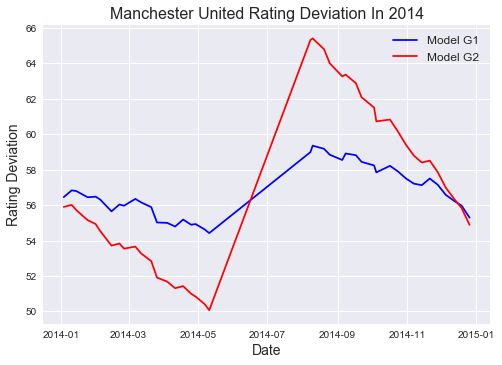

In [31]:
plt.plot(df2['Date'], df2['Vanilla'], color='blue')
plt.plot(df2['Date'], df2['Boost'], color='red')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Rating Deviation', fontsize=14)
plt.legend(('Model G1', 'Model G2'), fontsize=12)
plt.title('Manchester United Rating Deviation In 2014', fontsize=16)
plt.savefig('G2G1.png')
plt.show()

In [33]:
Manager=pd.read_csv('UnitedManager.csv')

In [34]:
Manager
ManagerRd=Manager['Rd']

In [117]:
df1 = pd.DataFrame(date)
df2 = pd.DataFrame(BoostRd)
df3 = pd.DataFrame(VanillaRd)
df4=pd.DataFrame(ManagerRd)

df5 = pd.concat([df1, df2, df3, df4], join='outer', axis=1)
df5.columns = ['Date', 'Boost', 'Vanilla','Manager']
df5['Date']=pd.to_datetime(df5['Date'])

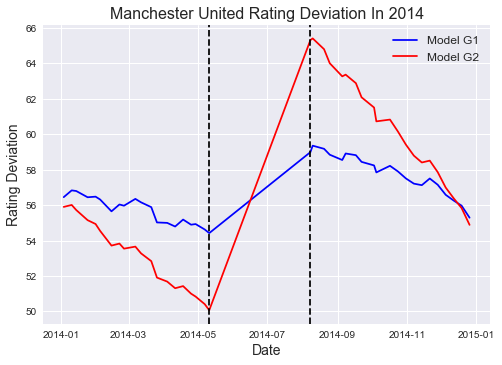

In [118]:
plt.plot(df5['Date'], df5['Vanilla'], color='blue')
plt.plot(df5['Date'], df5['Boost'], color='red')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Rating Deviation', fontsize=14)
plt.legend(('Model G1', 'Model G2'), fontsize=12)
plt.title('Manchester United Rating Deviation In 2014', fontsize=16)
plt.axvline(x='2014-05-11',  linestyle='--', color='black')
plt.axvline(x='2014-08-08', linestyle='--', color='black')
plt.savefig('G2G1.png')
plt.show()

In [40]:
VanillaRating=Vanilla['Rating']
BoostRating=Boost['Rating']
ManagerRating=Manager['Rating']

In [107]:
df1 = pd.DataFrame(date)
df2 = pd.DataFrame(BoostRating)
df3 = pd.DataFrame(VanillaRating)
df4=pd.DataFrame(ManagerRating)
df5 = pd.concat([df1, df2, df3, df4], join='outer', axis=1)
df5.columns = ['Date', 'Boost', 'Vanilla','Manager']
df5['Date']=pd.to_datetime(df5['Date'])

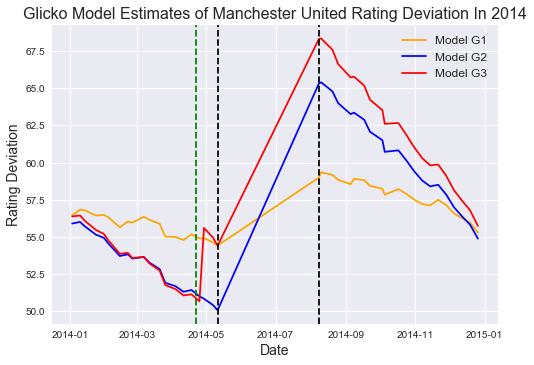

In [123]:
plt.plot(df5['Date'], df5['Vanilla'],color='orange')
plt.plot(df5['Date'], df5['Boost'], color='blue')
plt.plot(df5['Date'], df5['Manager'],color='red')
plt.axvline(x='2014-05-11',  linestyle='--', color='black')
plt.axvline(x='2014-08-08', linestyle='--', color='black')
plt.axvline(x='2014-04-22', linestyle='--', color='green')

plt.legend(('Model G1', 'Model G2', 'Model G3'), fontsize=12)
plt.title('Glicko Model Estimates of Manchester United Rating Deviation In 2014', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Rating Deviation', fontsize=14)
plt.savefig('G3G2G1.png')
plt.show()

In [106]:
df5

,Date,Boost,Vanilla,Manager
0,2014-01-03,55.898114,56.449008,56.377164
1,2014-01-10,56.008051,56.830048,56.440200
2,2014-01-14,55.720731,56.793654,56.093229
3,2014-01-24,55.149447,56.441444,55.466129
4,2014-01-31,54.933155,56.475606,55.197082
5,2014-02-04,54.545931,56.315101,54.753760
6,2014-02-14,53.715094,55.648151,53.861901
7,2014-02-21,53.829491,56.034638,53.927878
8,2014-02-25,53.543306,55.965456,53.581947
9,2014-03-07,53.658069,56.349767,53.648268


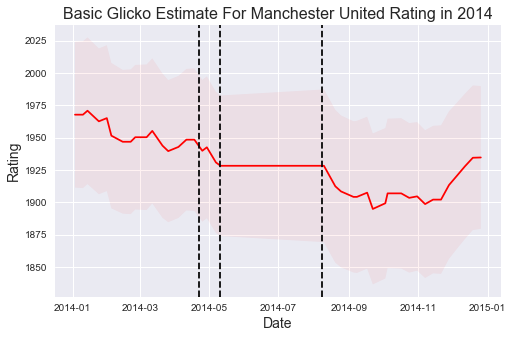

In [112]:
Vanilla['TimeStamp']=pd.to_datetime(Vanilla['TimeStamp'])
fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.plot(Vanilla['TimeStamp'].values,Vanilla['Rating'], color='red')
ax.fill_between(Vanilla['TimeStamp'].values, Vanilla['Rating']-Vanilla['Rd'],Vanilla['Rating']+Vanilla['Rd'], facecolor='red', alpha=.05)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.title('Basic Glicko Estimate For Manchester United Rating in 2014', fontsize=16)
plt.axvline(x='2014-05-11',  linestyle='--', color='black')
plt.axvline(x='2014-08-08', linestyle='--', color='black')
#plt.savefig('UnitedBasicRating.png')
plt.show()

In [100]:
Vanilla['TimeStamp'][0]

'2014-01-03'